In [1]:
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle  
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import *
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [10]:
df = pd.read_csv("./1115-TRAIN-CANCER-NORMAL.csv",sep=';',index_col=0,decimal=",").round(3)
df = shuffle(df) 
df.head(5)

,ENSG00000117791,ENSG00000173838,ENSG00000184702,ENSG00000140623,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000166535,ENSG00000118017,ENSG00000205002,...,ENSG00000166634,ENSG00000203870,ENSG00000188176,ENSG00000157703,ENSG00000107807,ENSG00000087128,ENSG00000164761,ENSG00000134588,ENSG00000243660,merged.numeric
TCGA-3H-AB3T-01,-0.267,-5.574,2.710,-2.635,3.100,-9.966,6.698,-9.966,-9.966,2.716,...,-9.966,-9.966,-0.969,-4.293,-9.966,-9.966,5.742,-9.966,0.857,35
GTEX-XUYS-0226-SM-47JX1,5.177,-3.047,5.278,-0.711,2.151,-6.506,8.374,-2.315,-5.012,-9.966,...,-9.966,-3.816,-0.357,-1.732,-9.966,-3.626,1.923,-9.966,2.125,2
TCGA-ER-A2NH-06,3.402,-0.783,4.109,-9.966,4.653,-9.966,9.374,1.252,-4.035,-0.216,...,-9.966,-9.966,-2.053,-3.308,-9.966,-0.452,1.907,-9.966,0.044,49
GTEX-11TT1-2326-SM-5GU6N,3.200,-9.966,0.800,-9.966,-0.808,-6.506,4.418,-4.035,-9.966,-5.574,...,-4.293,0.139,8.892,-9.966,-9.966,-9.966,-1.086,-9.966,-0.042,36
TCGA-FP-A8CX-01,2.850,-6.506,0.557,-3.171,1.714,2.718,6.021,-9.966,1.990,-4.293,...,-9.966,-9.966,-3.458,-2.053,0.423,-6.506,3.363,-9.966,1.486,53


In [13]:
x = (1/(1+np.exp(-df.iloc[:,:-1]))).values
y = df['merged.numeric'].values


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = np_utils.to_categorical(y_train, 65)
y_test = np_utils.to_categorical(y_test, 65)
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (17404, 3778)
Testing matrix shape (916, 3778)


In [15]:
model = Sequential()
model.add(Dense(2000, activation='sigmoid', input_shape=(3778,)))
model.add(Dropout(0.2))
model.add(Dense(800, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(2000, activation='relu'))
model.add(Dense(3778, activation='linear'))

In [16]:
model.compile(loss='mse',
              optimizer=Adam())
model.fit(x_train, x_train,
          epochs=100,
          batch_size=1000)
#score = model.evaluate(x_test, x_test)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Epoch 1/100
17404/17404 [==============================] - 1s 65us/step - loss: 0.1016
Epoch 2/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0582
Epoch 3/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0507
Epoch 4/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0436
Epoch 5/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0374
Epoch 6/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0332
Epoch 7/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0302
Epoch 8/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0280
Epoch 9/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0261
Epoch 10/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0247
Epoch 11/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0235
Epoch 12/100
17404/17404 [===============

17404/17404 [==============================] - 1s 46us/step - loss: 0.0136
Epoch 95/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0135
Epoch 96/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0137
Epoch 97/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0135
Epoch 98/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0135
Epoch 99/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0134
Epoch 100/100
17404/17404 [==============================] - 1s 46us/step - loss: 0.0134


In [24]:
K.clear_session()

In [17]:
x_pre=model.predict(x_test)

In [18]:
x_test

array([[  9.80866611e-01,   3.05311754e-02,   7.10126817e-01, ...,
          2.52372265e-01,   6.61354465e-03,   9.37321067e-01],
       [  9.64531600e-01,   2.58074611e-01,   9.72266793e-01, ...,
          6.91683173e-01,   1.49221555e-03,   9.18937683e-01],
       [  8.32018375e-01,   8.00592244e-01,   9.21651483e-01, ...,
          8.58635128e-01,   4.69678635e-05,   8.57049823e-01],
       ..., 
       [  9.97470021e-01,   4.11685973e-01,   9.93313789e-01, ...,
          9.08794165e-01,   4.69678635e-05,   8.84218574e-01],
       [  9.70716238e-01,   6.61354465e-03,   7.14838326e-01, ...,
          9.92217004e-01,   3.05311754e-02,   7.31255174e-01],
       [  9.91607606e-01,   1.25867739e-01,   9.78374064e-01, ...,
          5.05941696e-02,   4.69678635e-05,   8.98712456e-01]], dtype=float32)

In [57]:
mse=((x_test-x_pre)**2).mean(axis=1)

In [19]:
x_pre

array([[  9.35333788e-01,   3.60254161e-02,   7.14893997e-01, ...,
          7.89283216e-01,   2.51407968e-03,   9.07239377e-01],
       [  9.49077606e-01,   3.27576101e-01,   9.24969137e-01, ...,
          7.45792925e-01,   1.10484213e-02,   8.61416459e-01],
       [  8.41010451e-01,   5.55914164e-01,   8.57202470e-01, ...,
          7.26058424e-01,  -4.35067341e-04,   8.85647476e-01],
       ..., 
       [  9.76839840e-01,   5.00220656e-01,   9.70766544e-01, ...,
          8.40421140e-01,  -1.24486666e-02,   8.58327210e-01],
       [  9.38353896e-01,  -5.00581786e-03,   6.72043800e-01, ...,
          7.73094475e-01,   1.41654741e-02,   7.54794061e-01],
       [  9.84893560e-01,   2.78782755e-01,   9.82645631e-01, ...,
          1.12676546e-01,   1.71208568e-03,   8.87922823e-01]], dtype=float32)

In [36]:
dfx=(2**df.iloc[:,:-1]-0.001).round(4)


In [37]:
dfx

,ENSG00000117791,ENSG00000173838,ENSG00000184702,ENSG00000140623,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000166535,ENSG00000118017,ENSG00000205002,...,ENSG00000277535,ENSG00000166634,ENSG00000203870,ENSG00000188176,ENSG00000157703,ENSG00000107807,ENSG00000087128,ENSG00000164761,ENSG00000134588,ENSG00000243660
TCGA-K4-A54R-11,6.0998,0.0700,4.0101,0.3000,2.4308,-0.0000,381.0922,1.3003,0.0400,0.1700,...,-0.0000,-0.0000,-0.0000,0.6698,0.2900,-0.0000,25.7758,0.5500,-0.0000,6.1210
TCGA-BF-AAP6-01,9.8823,0.2000,48.5019,-0.0000,72.0027,-0.0000,268.5403,0.0100,0.0100,3.0898,...,-0.0000,-0.0000,-0.0000,0.2400,-0.0000,0.0200,0.0500,0.7402,0.0100,1.2700
TCGA-AC-A3W5-01,13.7933,0.1200,56.0240,0.4499,37.9746,0.0300,197.8129,0.6501,-0.0000,3.6392,...,-0.0000,-0.0000,-0.0000,0.1700,2.1204,0.0300,0.0900,2.1800,0.0100,3.0600
GTEX-147F3-0726-SM-5NQ9U,40.7002,1.0903,11.8013,0.1300,20.1950,0.0600,1870.2290,0.0900,0.0500,4.6903,...,-0.0000,-0.0000,-0.0000,6.6014,0.1100,-0.0000,-0.0000,8.5081,-0.0000,4.8693
GTEX-XQ3S-0426-SM-4BOOA,9.6321,-0.0000,2.6307,-0.0000,2.3204,-0.0000,24.1331,0.0800,-0.0000,0.1000,...,-0.0000,-0.0000,-0.0000,177.0474,-0.0000,-0.0000,0.0200,0.4800,-0.0000,0.9103
GTEX-132QS-0426-SM-5KLZ6,15.0627,-0.0000,61.9047,0.1400,1.7595,-0.0000,155.2006,0.0300,-0.0000,-0.0000,...,-0.0000,-0.0000,-0.0000,11.9993,-0.0000,0.1800,0.0100,8.9995,-0.0000,1.5295
TCGA-CN-4742-01,1.5901,0.0100,49.3497,-0.0000,5.6913,-0.0000,51.9111,89.6346,-0.0000,0.0300,...,-0.0000,0.8001,-0.0000,0.4301,0.0700,-0.0000,1.7305,2.3398,-0.0000,2.3807
TCGA-AB-3008-03,0.4301,0.0700,48.4347,0.0300,11.0569,-0.0000,11.5504,0.2699,0.0300,-0.0000,...,-0.0000,-0.0000,-0.0000,-0.0000,4.8491,-0.0000,-0.0000,0.2100,-0.0000,4.9304
GTEX-13OW6-1526-SM-5L3HX,26.5556,0.1000,53.0019,-0.0000,15.7241,0.0700,654.3859,0.0500,0.0600,0.3300,...,-0.0000,-0.0000,-0.0000,0.0600,-0.0000,-0.0000,-0.0000,99.2493,-0.0000,4.2713
TCGA-AC-A6IX-06,27.6642,0.1000,42.9316,0.9003,21.3762,0.0100,103.0347,3.1504,0.0300,16.8879,...,-0.0000,-0.0000,-0.0000,0.3300,1.5802,0.0300,21.3318,1.5703,0.0200,3.8601


In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([  2.86800000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          8.23000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   6.14000000e+02,
          0.00000000e+00,   0.00000000e+00,   4.47000000e+02,
          0.00000000e+00,   4.26000000e+02,   0.00000000e+00,
          4.04000000e+02,   4.29000000e+02,   0.00000000e+00,
          3.79000000e+02,   4.05000000e+02,   7.53000000e+02,
          3.15000000e+02,   5.34000000e+02,   4.75000000e+02,
          4.06000000e+02,   4.09000000e+02,   5.55000000e+02,
          4.66000000e+02,   4.42000000e+02,   4.84000000e+02,
          4.98000000e+02,   4.46000000e+02,   4.49000000e+02,
        

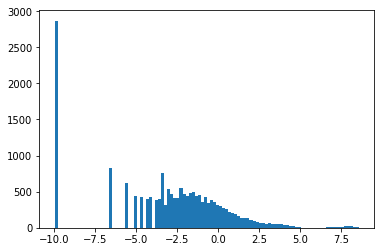

In [53]:
plt.hist(df.iloc[:,1].values,bins=100)

In [54]:
gene1=df.iloc[:,1].values

(array([ 148.,  137.,  149.,  121.,  128.,  105.,  127.,  110.,   98.,
         101.,   96.,   91.,   92.,   80.,   65.,   82.,   61.,   65.,
          64.,   70.,   57.,   59.,   54.,   58.,   38.,   40.,   48.,
          38.,   40.,   35.,   32.,   26.,   34.,   27.,   23.,   32.,
          35.,   25.,   28.,   28.,   30.,   19.,   31.,   29.,   21.,
          21.,   16.,   24.,   18.,   17.,    9.,   11.,   14.,   13.,
           5.,    6.,    8.,    2.,    1.,    0.,    1.,    2.,    0.,
           1.,    0.,    0.,    1.,    1.,    1.,    0.,    0.,    1.,
           1.,    0.,    1.,    0.,    1.,    3.,    1.,    6.,    1.,
           1.,    5.,    3.,    5.,    4.,    7.,    7.,    7.,    9.,
          11.,   12.,   14.,    7.,   12.,   10.,   11.,    3.,    3.,    3.]),
 array([  1.00000000e-03,   8.69700000e-02,   1.72940000e-01,
          2.58910000e-01,   3.44880000e-01,   4.30850000e-01,
          5.16820000e-01,   6.02790000e-01,   6.88760000e-01,
          7.74730000e-01

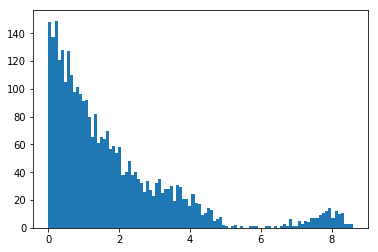

In [57]:
plt.hist(gene1[gene1>0],bins=100)

In [2]:
!ls

1115-ALL-MERGED.RData
1115-TRAIN-CANCER-NORMAL.csv
1115-TRAIN-DEFINITION.csv
1115MERGED.RData
ALL-SAMPLE-DEF.csv
ALL_MERGED_5K_GENES.csv
GTEX_TISSUES.csv
GTEX_phenotype
ICGC-EXPR.csv
RF classifier.ipynb
TCGA_GTEx-AE.ipynb
TCGA_GTEx-succeed.ipynb
TCGA_GTEx.ipynb
TCGA_mRNA_phenotype.txt
Untitled.ipynb
Untitled1.ipynb
g_ctype_tissue.txt
gencode.v23.annotation.gene.probeMap
gene_ensg.tsv
gene_merged.csv
gtex.rda
gtex2.RData
gtex3.rda
gtex4.RData
gtex_RSEM_gene_tpm
joint_fpkm_uq.tsv.gz
mark.txt
merged.rds
notebook.tex
pcawg.rnaseq.extended.metadata.aliquot_id.tsv
slc.csv
tcga.RData
tcga2.rda
tcga3.rda
tcga_RSEM_gene_tpm
tcga_train.csv
tcga_train_matched.csv
test
train_set.csv
train_x.csv


In [12]:
!'/Users/chris/Devel/git/cuda-smi/cuda-smi'

Device 0 [PCIe 0:1:0.0]: GeForce GTX 1070 (CC 6.1): 939.57 of 8191.8 MB (i.e. 11.5%) Free


In [9]:
df=1/(1+np.exp(df))

In [16]:
df

,ENSG00000117791,ENSG00000173838,ENSG00000184702,ENSG00000140623,ENSG00000121410,ENSG00000148584,ENSG00000175899,ENSG00000166535,ENSG00000118017,ENSG00000205002,...,ENSG00000166634,ENSG00000203870,ENSG00000188176,ENSG00000157703,ENSG00000107807,ENSG00000087128,ENSG00000164761,ENSG00000134588,ENSG00000243660,merged.numeric
GTEX-132NY-0626-SM-5L3D9,0.006633,0.996219,0.001706,0.999953,0.013613,0.998508,0.000057,0.959728,0.954653,0.938601,...,0.986520,0.999953,0.886250,0.999953,0.999953,0.999953,0.001271,0.999953,0.088588,9.110512e-04
TCGA-KN-8432-01,0.002584,0.026909,0.232188,0.999953,0.235592,0.996219,0.001033,0.996219,0.999953,0.993386,...,0.999953,0.999953,0.990127,0.008995,0.999953,0.003058,0.201170,0.999953,0.431435,3.775135e-11
TCGA-BR-7707-01,0.702661,0.993386,0.152646,0.999953,0.296296,0.949406,0.002689,0.043772,0.999953,0.978459,...,0.999953,0.999953,0.978459,0.986520,0.496000,0.993386,0.861881,0.999953,0.296296,9.602680e-24
GTEX-13VXU-0011-R7b-SM-5SI72,0.035709,0.240306,0.000494,0.355259,0.016175,0.990127,0.002527,0.186943,0.993386,0.455617,...,0.999953,0.999953,0.954653,0.697200,0.999953,0.999953,0.933080,0.999953,0.079292,1.233946e-04
GTEX-WFON-1526-SM-4LVMP,0.014500,0.144427,0.011658,0.990127,0.049784,0.978459,0.000375,0.974068,0.978459,0.088830,...,0.999953,0.974068,0.583705,0.999953,0.990127,0.993386,0.380836,0.999953,0.088105,7.095474e-23
TCGA-3X-AAVA-01,0.001375,0.969469,0.030531,0.999953,0.043772,0.202943,0.002025,0.843565,0.148679,0.969469,...,0.999953,0.999953,0.982622,0.999953,0.999953,0.892256,0.143441,0.999953,0.061284,8.315280e-07
TCGA-E7-A3X6-01,0.087704,0.974068,0.128420,0.974068,0.141851,0.999953,0.002475,0.018289,0.999953,0.974068,...,0.996219,0.999953,0.954653,0.825202,0.974068,0.142950,0.116603,0.999953,0.342539,6.692851e-03
TCGA-BF-AAP2-01,0.114052,0.974068,0.033182,0.999953,0.002324,0.999953,0.000888,0.188467,0.996219,0.440286,...,0.340515,0.999953,0.996219,0.999953,0.982622,0.800911,0.927439,0.999953,0.190927,5.242886e-22
TCGA-MB-A5YA-01,0.024795,0.999953,0.007676,0.999953,0.007532,0.999953,0.000064,0.999953,0.998508,0.635063,...,0.999953,0.999953,0.998508,0.993386,0.999953,0.999953,0.998508,0.999953,0.256546,1.425164e-21
TCGA-EE-A2A6-06,0.148679,0.986520,0.024033,0.999953,0.002751,0.999953,0.000036,0.921724,0.993386,0.855820,...,0.999953,0.999953,0.964702,0.986520,0.999953,0.996219,0.411686,0.999953,0.395799,5.242886e-22


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2000)              7558000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 800)               1600800   
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1602000   
_________________________________________________________________
dense_4 (Dense)              (None, 3778)              7559778   
Total params: 18,320,578
Trainable params: 18,320,578
Non-trainable params: 0
_________________________________________________________________
